In [1]:
import emip_toolkit as emtk
import filter_fixation as ff
%load_ext autoreload
%autoreload 2

In [21]:
import json
def process_corrected(filename):
    participant = filename.split('.')[0][-3:]
    fixations = {}
    with open(filename) as file:
        dic = json.loads(file.read())
        for order, (x_cord, y_cord, duration) in dic.items():
            fixations[order] = emtk.Fixation(trial_id=8, 
                                             participant_id=participant,
                                             timestamp=0,
                                             duration=duration,
                                             x_cord=x_cord,
                                             y_cord=y_cord,
                                             token='',
                                             pupil=0)
    return fixations, participant

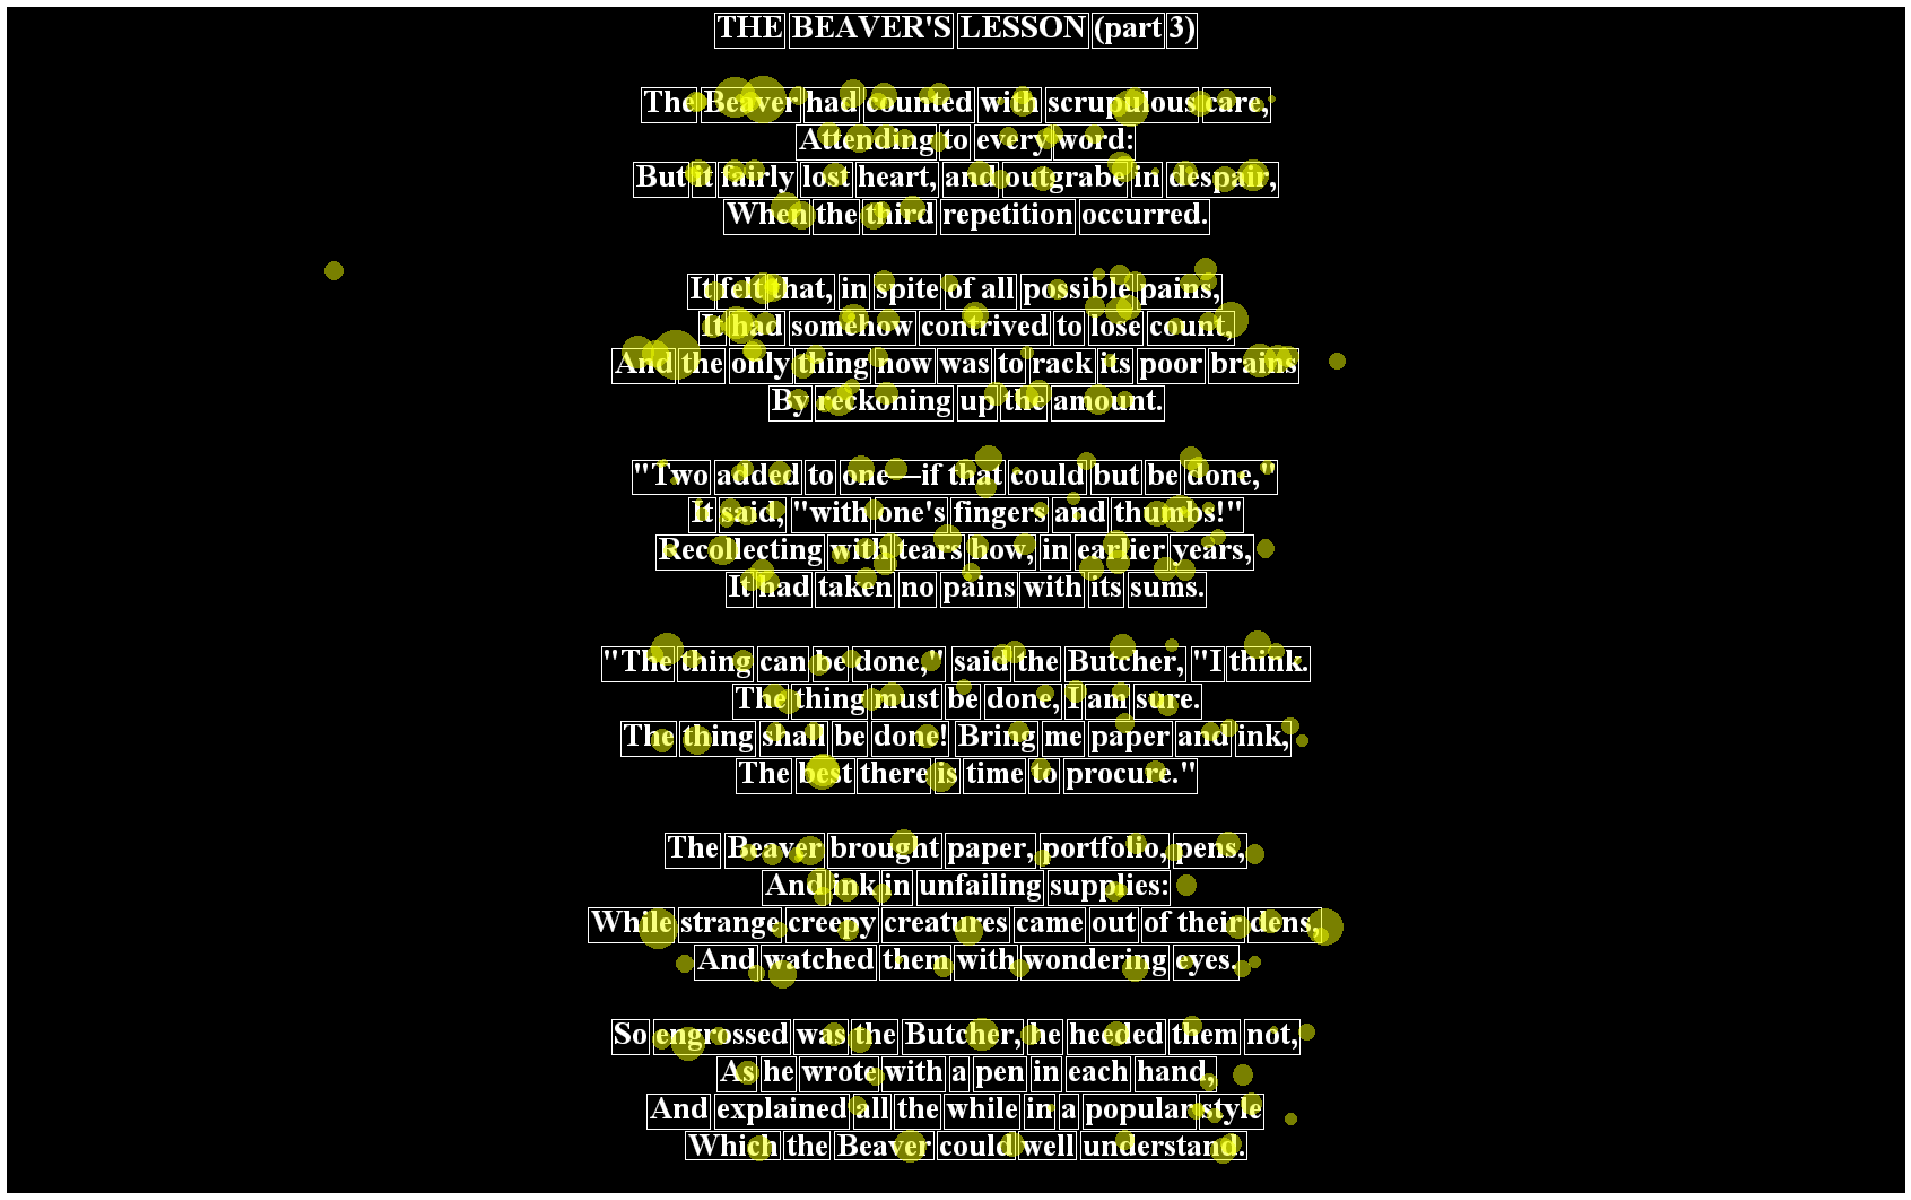

In [9]:
fixations = process_corrected('corrections/R8S1_001.txt')

test_trial = emtk.Trial(trial_id=8,
                       participant_id="001",
                       image="TEX_R8S1_bg.png",
                       fixations=fixations,
                       saccades={},
                       blinks={},
                       samples={},
                       eye_tracker="EyeLink1000_")

image_path = 'datasets/GazeBase_TEX/StimuliExamples/TEXScreenshots/'
test_trial.draw_trial(image_path=image_path, draw_saccade=False, draw_aoi=True, draw_number=False)

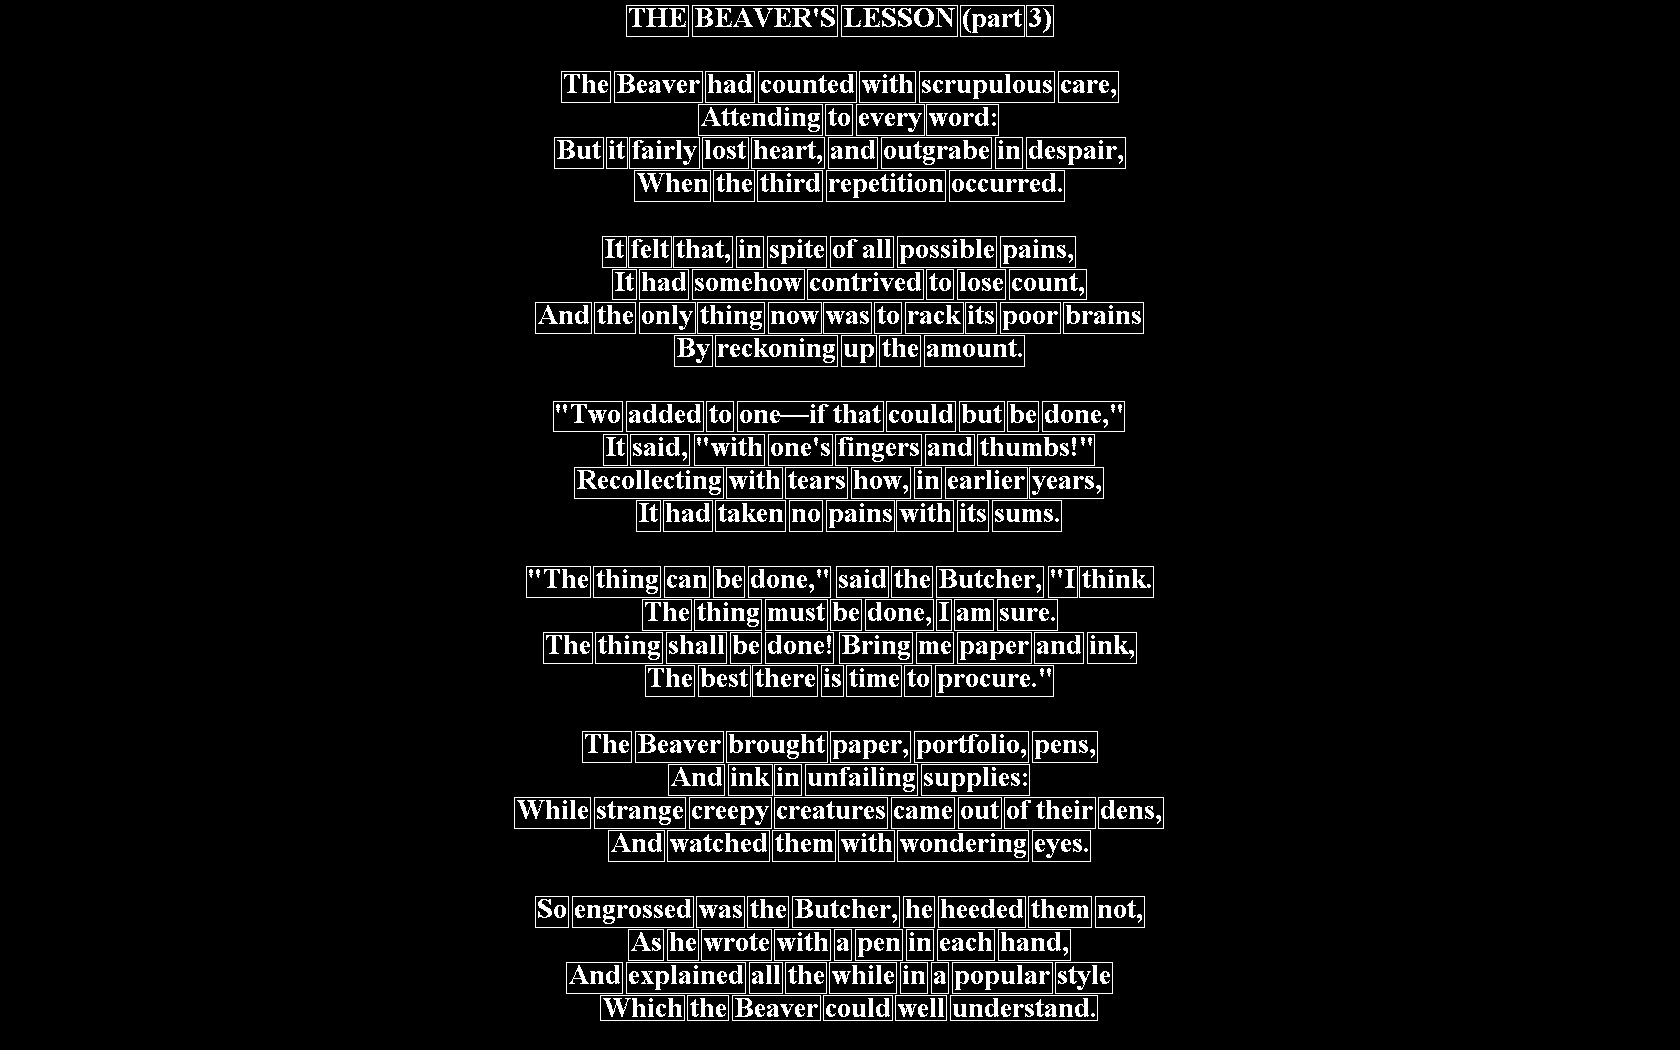

In [10]:
aoi = emtk.find_aoi(image='TEX_R8S1_bg.png', image_path=image_path)

emtk.draw_aoi(aoi, image='TEX_R8S1_bg.png', image_path=image_path)

In [11]:
aoi.head()

,kind,name,x,y,width,height,local_id,image
0,sub-line,line 1 part 1,626.5,5,63,32,NaN,TEX_R8S1_bg.png
1,sub-line,line 1 part 2,692.5,5,146,32,NaN,TEX_R8S1_bg.png
2,sub-line,line 1 part 3,841.5,5,117,32,NaN,TEX_R8S1_bg.png
3,sub-line,line 1 part 4,960.5,5,65,32,NaN,TEX_R8S1_bg.png
4,sub-line,line 1 part 5,1026.5,5,28,32,NaN,TEX_R8S1_bg.png


In [12]:
file_path = 'datasets/GazeBase_TEX/StimuliExamples/TEXTexts/'
aoi_token = emtk.add_tokens_to_AOIs(file_path=file_path, aois_raw=aoi)
aoi_token

,kind,name,x,y,width,height,local_id,image,token
0,sub-line,line 1 part 1,626.5,5,63,32,NaN,TEX_R8S1_bg.png,THE
1,sub-line,line 1 part 2,692.5,5,146,32,NaN,TEX_R8S1_bg.png,BEAVER'S
2,sub-line,line 1 part 3,841.5,5,117,32,NaN,TEX_R8S1_bg.png,LESSON
3,sub-line,line 1 part 4,960.5,5,65,32,NaN,TEX_R8S1_bg.png,(part
4,sub-line,line 1 part 5,1026.5,5,28,32,NaN,TEX_R8S1_bg.png,3)
...,...,...,...,...,...,...,...,...,...
179,sub-line,line 25 part 2,687.5,995,42,26,NaN,TEX_R8S1_bg.png,the
180,sub-line,line 25 part 3,732.5,995,89,26,NaN,TEX_R8S1_bg.png,Beaver
181,sub-line,line 25 part 4,823.5,995,70,26,NaN,TEX_R8S1_bg.png,could
182,sub-line,line 25 part 5,895.5,995,52,26,NaN,TEX_R8S1_bg.png,well


In [13]:
df = emtk.hit_test(test_trial, aoi_token)

all fixations: 272


In [18]:
df

,trial,participant,code_file,code_language,timestamp,duration,x_cord,y_cord,aoi_x,aoi_y,aoi_width,aoi_height,token,length
0,8,001,TEX_R8S1_bg.png,TEX_R8S1_bg.png,0,203,782.218226,476.857146,726.5,467,57,32,with,4
1,8,001,TEX_R8S1_bg.png,TEX_R8S1_bg.png,0,203,782.218226,476.857146,785.5,467,63,32,tears,5
2,8,001,TEX_R8S1_bg.png,TEX_R8S1_bg.png,0,143,770.854839,83.725806,758.5,71,99,32,counted,7
3,8,001,TEX_R8S1_bg.png,TEX_R8S1_bg.png,0,168,610.080645,83.725806,561.5,71,50,32,The,3
4,8,001,TEX_R8S1_bg.png,TEX_R8S1_bg.png,0,168,610.080645,83.725806,614.5,71,89,32,Beaver,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,8,001,TEX_R8S1_bg.png,TEX_R8S1_bg.png,0,156,659.616025,304.698076,639.5,302,57,32,only,4
311,8,001,TEX_R8S1_bg.png,TEX_R8S1_bg.png,0,293,1108.661290,313.145161,1063.5,302,81,32,brains,6
312,8,001,TEX_R8S1_bg.png,TEX_R8S1_bg.png,0,129,747.909303,335.824807,715.5,335,123,32,reckoning,9
313,8,001,TEX_R8S1_bg.png,TEX_R8S1_bg.png,0,178,700.403226,347.467742,674.5,335,39,32,By,2


In [26]:
df.to_csv('Hit Test Result.csv')

## Mega Result

In [19]:
from tqdm import tqdm

import os
import pandas as pd

file_lst = []

tex_file_path = 'corrections/'
for r, d, f in os.walk(tex_file_path):
    for file_name in f:
        if file_name.endswith('.txt'):
            file_lst.append(tex_file_path + file_name)

import emip_toolkit as emtk
import filter_fixation as ff
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
file_lst

['corrections/R8S1_192.txt',
 'corrections/R8S1_179.txt',
 'corrections/R8S1_152.txt',
 'corrections/R8S1_180.txt',
 'corrections/R8S1_154.txt',
 'corrections/R8S1_196.txt',
 'corrections/R8S1_244.txt',
 'corrections/R8S1_331.txt',
 'corrections/R8S1_285.txt',
 'corrections/R8S1_120.txt',
 'corrections/R8S1_043.txt',
 'corrections/R8S1_137.txt',
 'corrections/R8S1_136.txt',
 'corrections/R8S1_259.txt',
 'corrections/R8S1_271.txt',
 'corrections/R8S1_107.txt',
 'corrections/R8S1_064.txt',
 'corrections/R8S1_288.txt',
 'corrections/R8S1_128.txt',
 'corrections/R8S1_314.txt',
 'corrections/R8S1_249.txt',
 'corrections/R8S1_063.txt',
 'corrections/R8S1_207.txt',
 'corrections/R8S1_007.txt',
 'corrections/R8S1_016.txt',
 'corrections/R8S1_215.txt',
 'corrections/R8S1_001.txt',
 'corrections/R8S1_217.txt',
 'corrections/R8S1_216.txt']

In [23]:
image_path = 'datasets/GazeBase_TEX/StimuliExamples/TEXScreenshots/'
file_path = 'datasets/GazeBase_TEX/StimuliExamples/TEXTexts/'

headers = ["round",
           "session",
           "participant",
           "line_part",
           "stimuli_image",
           "stimuli_text",
           "timestamp",
           "duration",
           "x_cord",
           "y_cord",
           "aoi_x",
           "aoi_y",
           "aoi_width",
           "aoi_height",
           "token",
           "length"]

mega_result = pd.DataFrame(columns=headers)

gone = []

for file in tqdm(file_lst):

    fixations, participant = process_corrected(file)
    
    file_name = file.split('/')[-1]
    
    round_id = '8'
    participant_id = participant
    session_id = '1'
    image = f'TEX_R8S1_bg.png'
    
    for fix in fixations.values():
        fix.trial_id = round_id + session_id
        fix.participant_id = participant_id

    trial = emtk.Trial(trial_id=round_id+session_id,
                       participant_id=participant_id,
                       image=image,
                       fixations=fixations,
                       saccades={},
                       blinks={},
                       samples={},
                       eye_tracker="EyeLink1000_")
    
    aoi = emtk.find_aoi(image=trial.image, image_path=image_path)
    aoi_token = emtk.add_tokens_to_AOIs(file_path=file_path, aois_raw=aoi)
    df = emtk.hit_test_GazeBase(trial, aoi_token)
    
    mega_result = pd.concat([mega_result, df])

100%|██████████| 29/29 [00:51<00:00,  1.79s/it]


In [24]:
mega_result

,round,session,participant,line_part,stimuli_image,stimuli_text,timestamp,duration,x_cord,y_cord,aoi_x,aoi_y,aoi_width,aoi_height,token,length
0,8,1,192,line 3 part 1,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,91,704.016129,114.435484,698.5,104,125,32,Attending,9
1,8,1,192,line 2 part 2,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,234,653.334615,79.597863,614.5,71,89,32,Beaver,6
2,8,1,192,line 2 part 3,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,168,730.727382,85.236307,705.5,71,50,32,had,3
3,8,1,192,line 2 part 6,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,254,1003.315747,83.226378,919.5,71,136,32,scrupulous,10
4,8,1,192,line 2 part 6,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,125,956.919355,78.306452,919.5,71,136,32,scrupulous,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,8,1,216,line 15 part 3,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,161,779.585713,596.068324,765.5,599,63,32,must,4
151,8,1,216,line 14 part 2,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,323,647.824206,577.010040,593.5,566,68,32,thing,5
152,8,1,216,line 15 part 2,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,224,720.158928,599.699554,694.5,599,68,32,thing,5
153,8,1,216,line 12 part 1,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,395,715.966330,482.148350,574.5,467,150,32,Recollecting,12


In [25]:
mega_result.to_csv('81_Hit_Test_Result.csv')

In [26]:
mega_result.reset_index(inplace=True)

In [27]:
datatype = {'index': str,
            'round': str, 
            'session': str,
            'line_part': str,
            'participant': str,
            'stimuli_image': str,
            'stimuli_text': str,
            'duration': 'int64',
            'x_cord': 'float64',
            'y_cord': 'float64',
            'aoi_x': 'float64',
            'aoi_y': 'float64', 
            'aoi_width': 'float64', 
            'aoi_height': 'float64',
            'token': str,
            'length': 'int64'}

mega_result = mega_result.astype(datatype)

In [28]:
mega_result.dtypes

index             object
round             object
session           object
participant       object
line_part         object
stimuli_image     object
stimuli_text      object
timestamp         object
duration           int64
x_cord           float64
y_cord           float64
aoi_x            float64
aoi_y            float64
aoi_width        float64
aoi_height       float64
token             object
length             int64
dtype: object

In [29]:
mega_result['index'] = mega_result['round'] + mega_result['session'] + mega_result['participant'] + '_' + mega_result['index']

In [30]:
mega_result.to_csv('8_1_raw_result.csv')

In [12]:
df = pd.read_csv('raw_result.csv', dtype=datatype)

In [13]:
df.dtypes

Unnamed: 0         int64
index             object
round             object
session           object
participant       object
line_part         object
stimuli_image     object
stimuli_text      object
timestamp        float64
duration           int64
x_cord           float64
y_cord           float64
aoi_x            float64
aoi_y            float64
aoi_width        float64
aoi_height       float64
token             object
length             int64
dtype: object

In [14]:
df

,Unnamed: 0,index,round,session,participant,line_part,stimuli_image,stimuli_text,timestamp,duration,x_cord,y_cord,aoi_x,aoi_y,aoi_width,aoi_height,token,length
0,0,11001_0,1,1,001,line 12 part 3,TEX_R1S1_bg.png,TEX_R1S1_text.txt,263.0,120,722.360000,488.112500,700.5,467.0,102.0,32.0,brought,7
1,1,11001_1,1,1,001,line 13 part 3,TEX_R1S1_bg.png,TEX_R1S1_text.txt,263.0,120,722.360000,488.112500,708.5,500.0,96.0,32.0,"Broker,",7
2,2,11001_2,1,1,001,line 12 part 3,TEX_R1S1_bg.png,TEX_R1S1_text.txt,519.0,255,736.400394,491.933725,700.5,467.0,102.0,32.0,brought,7
3,3,11001_3,1,1,001,line 13 part 3,TEX_R1S1_bg.png,TEX_R1S1_text.txt,519.0,255,736.400394,491.933725,708.5,500.0,96.0,32.0,"Broker,",7
4,4,11001_4,1,1,001,line 12 part 4,TEX_R1S1_bg.png,TEX_R1S1_text.txt,698.0,161,809.180746,494.226708,803.5,467.0,28.0,32.0,to,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537661,537661,92314_304,9,2,314,line 7 part 5,TEX_R9S2_bg.png,TEX_R9S2_text.txt,59424.0,70,1043.085715,265.241425,928.5,269.0,159.0,32.0,every,5
537662,537662,92314_305,9,2,314,line 6 part 6,TEX_R9S2_bg.png,TEX_R9S2_text.txt,59573.0,148,1046.345271,264.358783,946.5,236.0,130.0,32.0,frequently,10
537663,537663,92314_306,9,2,314,line 7 part 5,TEX_R9S2_bg.png,TEX_R9S2_text.txt,59573.0,148,1046.345271,264.358783,928.5,269.0,159.0,32.0,every,5
537664,537664,92314_307,9,2,314,line 6 part 7,TEX_R9S2_bg.png,TEX_R9S2_text.txt,59946.0,364,1081.592856,260.325826,1077.5,236.0,65.0,32.0,finds,5


In [31]:
import string
mega_result['token'] = mega_result['token'].str.lower().str.strip(string.punctuation)
mega_result['length'] = mega_result['token'].str.len()

In [32]:
mega_result

,index,round,session,participant,line_part,stimuli_image,stimuli_text,timestamp,duration,x_cord,y_cord,aoi_x,aoi_y,aoi_width,aoi_height,token,length
0,81192_0,8,1,192,line 3 part 1,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,91,704.016129,114.435484,698.5,104.0,125.0,32.0,attending,9
1,81192_1,8,1,192,line 2 part 2,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,234,653.334615,79.597863,614.5,71.0,89.0,32.0,beaver,6
2,81192_2,8,1,192,line 2 part 3,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,168,730.727382,85.236307,705.5,71.0,50.0,32.0,had,3
3,81192_3,8,1,192,line 2 part 6,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,254,1003.315747,83.226378,919.5,71.0,136.0,32.0,scrupulous,10
4,81192_4,8,1,192,line 2 part 6,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,125,956.919355,78.306452,919.5,71.0,136.0,32.0,scrupulous,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7265,81216_150,8,1,216,line 15 part 3,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,161,779.585713,596.068324,765.5,599.0,63.0,32.0,must,4
7266,81216_151,8,1,216,line 14 part 2,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,323,647.824206,577.010040,593.5,566.0,68.0,32.0,thing,5
7267,81216_152,8,1,216,line 15 part 2,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,224,720.158928,599.699554,694.5,599.0,68.0,32.0,thing,5
7268,81216_153,8,1,216,line 12 part 1,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,395,715.966330,482.148350,574.5,467.0,150.0,32.0,recollecting,12


In [33]:
mega_result.to_csv('8_1_processed_result.csv')

In [35]:
frequency = pd.read_csv('datasets/tokens_freq.csv')

In [36]:
frequency.set_index('Word', inplace=True)

In [37]:
freq = frequency.groupby('Word').max()

In [38]:
freq_dict = freq.to_dict()

In [39]:
freq_dict

{' Lemma Head': {'a': ' a',
  'able': ' able',
  'aboard': ' aboard',
  'about': ' about',
  'absolute': ' absolute',
  'absurd': ' absurd',
  'add': ' add',
  'added': ' add',
  'additional': ' additional',
  'advised': ' advise',
  'affectionate': ' affectionate',
  'after': ' after',
  'again': ' again',
  'against': ' against',
  'ages': ' age',
  'agree': ' agree',
  'ahead': ' ahead',
  'all': ' all',
  'almost': ' almost',
  'alone': ' alone',
  'along': ' along',
  'already': ' already',
  'also': ' also',
  'although': ' although',
  'always': ' always',
  'am': ' be',
  'ambition': ' ambition',
  'among': ' among',
  'amount': ' amount',
  'amply': ' amply',
  'an': ' an',
  'and': ' and',
  'angrily': ' angrily',
  'another': ' another',
  'answer': ' answer',
  'antediluvian': ' antediluvian',
  'any': ' any',
  'appeal': ' appeal',
  'appeared': ' appear',
  'approach': ' approach',
  'are': ' be',
  'arrange': ' arrange',
  'arrangement': ' arrangement',
  'art': ' be',
 

In [40]:
mega_result['CobMln'] = mega_result.token.apply(lambda x: freq_dict[' CobMln'].get(x, 1))

In [41]:
mega_result

,index,round,session,participant,line_part,stimuli_image,stimuli_text,timestamp,duration,x_cord,y_cord,aoi_x,aoi_y,aoi_width,aoi_height,token,length,CobMln
0,81192_0,8,1,192,line 3 part 1,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,91,704.016129,114.435484,698.5,104.0,125.0,32.0,attending,9,14
1,81192_1,8,1,192,line 2 part 2,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,234,653.334615,79.597863,614.5,71.0,89.0,32.0,beaver,6,2
2,81192_2,8,1,192,line 2 part 3,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,168,730.727382,85.236307,705.5,71.0,50.0,32.0,had,3,1248
3,81192_3,8,1,192,line 2 part 6,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,254,1003.315747,83.226378,919.5,71.0,136.0,32.0,scrupulous,10,1
4,81192_4,8,1,192,line 2 part 6,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,125,956.919355,78.306452,919.5,71.0,136.0,32.0,scrupulous,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7265,81216_150,8,1,216,line 15 part 3,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,161,779.585713,596.068324,765.5,599.0,63.0,32.0,must,4,184
7266,81216_151,8,1,216,line 14 part 2,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,323,647.824206,577.010040,593.5,566.0,68.0,32.0,thing,5,542
7267,81216_152,8,1,216,line 15 part 2,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,224,720.158928,599.699554,694.5,599.0,68.0,32.0,thing,5,542
7268,81216_153,8,1,216,line 12 part 1,TEX_R8S1_bg.png,TEX_R8S1_text.txt,0,395,715.966330,482.148350,574.5,467.0,150.0,32.0,recollecting,12,0


In [42]:
mega_result.to_csv('8_1_freq_result.csv')